This file is for the first paper, and it's using the model_first_paper.py for the agents

The reporters won't store the agents' position

In [20]:
from model_first_paper import *
import matplotlib.pyplot as plt
import seaborn as sns



In [21]:
map_width = 50
map_height = 50
moore = False

#Number of commuters, taxis, and noises
num_of_motorist = [30,15,5]

#With inventory
inv_size = 12
cp_size = int(np.ceil(inv_size/3))

#Without inventory
#cp_size = 10

model = switching_model(num_of_motorist,num_of_stations=10,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="less")



4


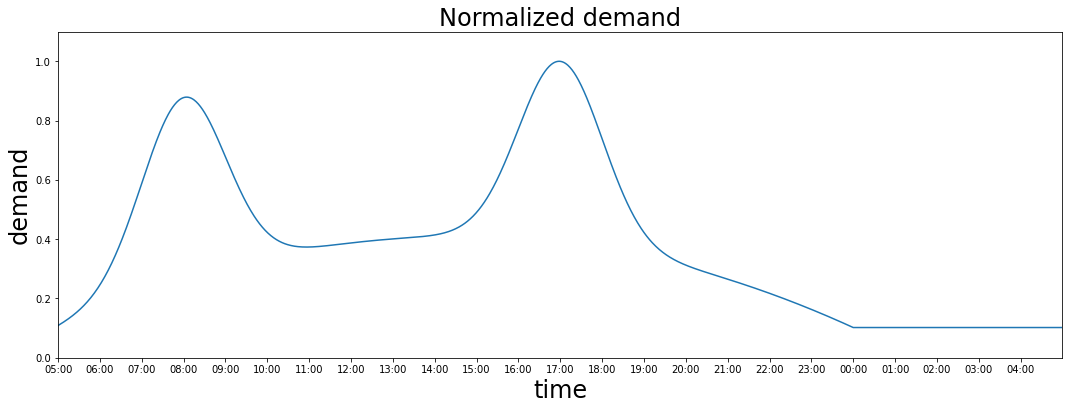

In [22]:
model.draw_prob_des()

In [23]:
#run model
#Dalam menit
days = 14
num_of_step = days*24*60
#num_of_step = 100
for i in range(num_of_step):
    model.step()

In [24]:
#Ambil data agent
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data.head()

Charge Alive
Step AgentID                   
0    0        2566.257004  None
     1        1724.791506  None
     2         550.560131  None
     3         507.766553  None
     4        1694.520118  None

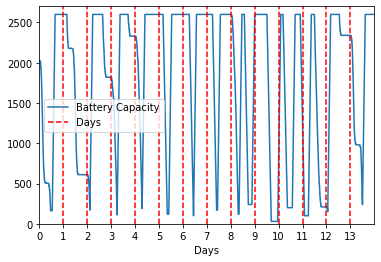

In [25]:
#Cek baterai
battery_id = 8
battery_energy = agent_data.xs(battery_id, level = "AgentID")["Charge"]
battery_energy.plot()
plt.xlim(0,num_of_step)
plt.ylim(0,2700)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Battery Capacity','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Example of Battery Charge Cycle')
plt.show()

In [26]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data.tail()

,num_of_alive,num_of_charging
20155,43,3
20156,43,3
20157,43,3
20158,43,3
20159,43,3


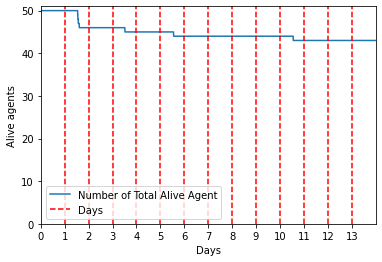

In [27]:
plt.plot(model_data["num_of_alive"])
plt.ylim([0,sum(num_of_motorist) + 1])
plt.ylabel("Alive agents")
plt.xlabel("Steps")
plt.xlim(0,num_of_step)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Number of Total Alive Agent','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Number of Total Alive Agent')
plt.show()

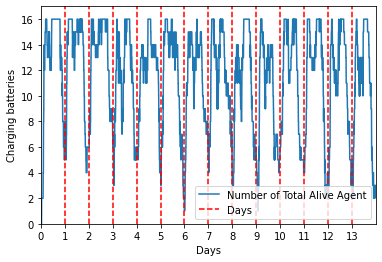

In [28]:
plt.plot(model_data["num_of_charging"])
plt.ylim([0,model.num_of_stations*model.cp_size +1])
plt.ylabel("Charging batteries")
plt.xlabel("Steps")
plt.xlim(0,num_of_step)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Number of Total Alive Agent','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Number of Total Alive Agent')
plt.show()

In [30]:
#Cek kategori motorist yang hidup
commuter_alive = 0
taxi_alive = 0
noise_alive = 0

for mot in model.motorists:
    if mot.alive:
        if mot.status == "commuter":
            commuter_alive +=1
        elif mot.status == "taxi":
            taxi_alive +=1
        elif mot.status == "noise":
            noise_alive += 1

print("Jumlah pemotor yang hidup masing-masing sebagai berikut:")
print('Commuter: ' + str(commuter_alive))
print('Taxi: ' + str(taxi_alive))
print('Noise: ' + str(noise_alive))

Jumlah pemotor yang hidup masing-masing sebagai berikut:
Commuter: 28
Taxi: 11
Noise: 4
